# NLP 기초

1. 애플 신제품 출시 : 아이패드 프로 4세대, 매직 키보드, 맥북에어
2. 아이패드 프로 4세대를 유튜브에서 검색
3. 영상 제목 및 정보는 큰 의미가 없음. 테크 유튜버 순위로 top3 의 댓글 가져옴.
4. 'ITSub잇섭', '가전주부', '테크몽'


## 1. 데이터 크롤링

In [172]:
# 필요 모듈 가져오기
from selenium import webdriver as wd
from bs4 import BeautifulSoup
import time
from urllib.request import urlopen

In [59]:
#url_1 = 'https://www.youtube.com/watch?v=qGuusISv6t8' # 잇섭
#url_2 = 'https://www.youtube.com/watch?v=C2yH_BgtwzE' # 가전주부
#url_3 = 'https://www.youtube.com/watch?v=Q84JBY5Sq9E' # 테크몽 

In [60]:
# 댓글 가져올 유튜브 영상 
driver = wd.Chrome(executable_path = 'chromedriver.exe')

base_url = 'https://www.youtube.com/watch?v={}'
target = ['qGuusISv6t8','C2yH_BgtwzE','Q84JBY5Sq9E']

# ID , Comments 저장 list
str_youtube_userIDs = [] 
str_youtube_comments = [] 

for n in range(len(target)):
    url = base_url.format(target[n])
    
    # url_1 댓글 부터 크롤링
    driver.get(url)

    last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    # 페이지 스크롤
    while True: 
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
        time.sleep(3.0) 
        new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
        if new_page_height == last_page_height: 
            break 
        last_page_height = new_page_height 

    # 데이터 저장    
    html_source = driver.page_source # 페이지의 데이터 받아옴
    #driver.close() 
    #driver.execute_script("window.open();")
    soup = BeautifulSoup(html_source, 'lxml') # BS, lxml로 파싱

    # 데이터의 ID 및 댓글 처리
    youtube_user_IDs = soup.select('div#header-author > a > span')
    youtube_comments = soup.select('yt-formatted-string#content-text')

    # 데이터 안에 의미없는 값 처리
    for i in range(len(youtube_user_IDs)): 
        str_tmp = str(youtube_user_IDs[i].text) 
        #print(str_tmp) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace('                ','') 
        
        str_youtube_userIDs.append(str_tmp) # ID 리스트에 저장

        str_tmp = str(youtube_comments[i].text) 
        str_tmp = str_tmp.replace('\n', '') 
        str_tmp = str_tmp.replace('\t', '') 
        str_tmp = str_tmp.replace('                ', '') 
        
        str_youtube_comments.append(str_tmp) # comments 리스트에 저장


In [61]:
# 확인
for i in range(len(str_youtube_userIDs)):
    print(str_youtube_userIDs[i],str_youtube_comments[i])

 그걸 돈 좀 더 주고사야겠다.. 사전예약으로사면 키보드도 주는데;;3세대 호환된다길래 왠일이지 했네 ㅋㅋ
SH P               프로 4세대 12.9랑 키보드 커버 살돈이면 맥북 프로 13인치 살 수 있는거 아님?
Tenor Ko               재활용 해서 수익률 높이고 매직 키보드로 정점을 찍는다! 으사아아!!!
Rahan Seo               도대체 뭘하면 키보드 가격이 40만원???
통통이삼촌               40만원 ㄷㄷㄷㄷㄷ
산호               난 그냥 3세대 써야징
심심이               혹시 가격이 추후에 올라가진 않겠죠??ㅠㅠㅠ초고성능이 아니라서 뭔가 다행인데ㅠㅠㅠㅠㅠ
한국스나?               테크몽님 오늘도 좋은 소식과정보 고맙습니다 항상 빠른정보 감사합니다
zz kzine               키보드 가격이 미친거 같아여
PortofinoS2               백라이트 충전단자 소리 듣고 30만원 넘겠네 예상했는데 그걸 뛰어넘는
리유               매직키보드...정말 가격이 어마어마하네요🤑😨
토착왜구               테크몽님 요번 아이패드느 안휠까요??ㅠㅠ지금3세대살까 4세대살까 고민중이라서욧
Andy kim               솔직히 가격대비 정말 안됐네요. 애플 하나 사면 돈이 왕창 깨지네요.
김홍균               3세대로 존버 해야겠다 매직 키보드 는  넘 비싸다
-잿빛피아노               키보드 말고 걍 7세대 하나 더 살래
K민               블루투스 마우스 지원한 이후부터 그냥 노트북임
윤현민               s6 키보드 테이프라서 안사고 있는데 저거보니 진짜 선녀같네요 ㅋㅋㅋㅋ
김유신               이거 4세대 구해서 리뷰하면 흰둥이님한테 테크몽님 혼날 거 같네요ㅠ
Tem Ba               와..가격이 선넘네...^^..(특히.케이스..ㅎㅎ..)
jun Tad

In [62]:
print(len(str_youtube_userIDs))

2293


In [78]:
# Pandas DataFrame처리
import pandas as pd
pd_data = {'ID':str_youtube_userIDs,'Comment':str_youtube_comments}

youtube_pd = pd.DataFrame(pd_data)

In [82]:
youtube_pd.tail(20)

,ID,Comment
2273,유봄,"프로3세대 64, 256기가 고민하다가 256 와이파이 주문하고 나머지 소모품 다 ..."
2274,l나타니엘,4세대는 존버하는 입장에서 패드는 좀 많이 아쉽긴 하지만 가격 변동이 오히려 낮아져...
2275,moda,하 역시나 가격은 ㅎㄷㄷ 탭s6 라이트 기달리던가 해야지 ㅠㅠ
2276,프르륵,배터리 사용량이 가장 높은 곳이 디스플레이 인데.. OLED 전환이 안된걸보면 동일...
2277,초롱레리,오빠 벽이랑 얼굴이랑 색이 같아서 얼굴이 회색으로 보여.. 기계 밖에 모르는 바보♡
2278,얼음과자,이건 뭐지 이 정도면 애플존버 실패같음새거 나오긴 했는데 큰 성능 향상 없으니 그냥...
2279,0 0,"45만원이면 전 괜찮은 가격이라 봅니다. 1,2년 쓰다 버릴게 아니라 애플은 못해도..."
2280,천랑,사람들 돈이 우스워보여?! 키보드가 무슨 45만ㄷㄷ 정말 정말 필요한 사람들만 사는...
2281,김웅수,키보드가 미쳤네가격이 미쳤네.....
2282,이무한,그냥 삼성이 저렇게 만들때까지 기다려야겠네요 ㄷㄷㄷ


## 2. 데이터 전처리

In [83]:
# Text Cleansing : 이모티콘, 특수문자, 의성어 제거

import re
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

comments_cleansing=[]
for i in range(len(youtube_pd)):
    a = re.sub(emoji_pattern,'',youtube_pd['Comment'].iloc[i])
    
    b = re.sub(han,'',a)
    
    comments_cleansing.append(b)
    
youtube_pd['Comment']=comments_cleansing

In [84]:
youtube_pd.tail(20)      # re 작동했음 확인

,ID,Comment
2273,유봄,프로3세대 64 256기가 고민하다가 256 와이파이 주문하고 나머지 소모품 다 준...
2274,l나타니엘,4세대는 존버하는 입장에서 패드는 좀 많이 아쉽긴 하지만 가격 변동이 오히려 낮아져...
2275,moda,하 역시나 가격은 탭s6 라이트 기달리던가 해야지
2276,프르륵,배터리 사용량이 가장 높은 곳이 디스플레이 인데 OLED 전환이 안된걸보면 동일할것...
2277,초롱레리,오빠 벽이랑 얼굴이랑 색이 같아서 얼굴이 회색으로 보여 기계 밖에 모르는 바보♡
2278,얼음과자,이건 뭐지 이 정도면 애플존버 실패같음새거 나오긴 했는데 큰 성능 향상 없으니 그냥...
2279,0 0,45만원이면 전 괜찮은 가격이라 봅니다 12년 쓰다 버릴게 아니라 애플은 못해도 5...
2280,천랑,사람들 돈이 우스워보여 키보드가 무슨 45만 정말 정말 필요한 사람들만 사는게 나을듯
2281,김웅수,키보드가 미쳤네가격이 미쳤네
2282,이무한,그냥 삼성이 저렇게 만들때까지 기다려야겠네요


In [90]:
# csv 파일 저장
youtube_pd.to_csv("C:\\Users\\jinji\\Desktop\\투빅스\\8주차\\NLP기초\\youtube.csv",header=True,index=False)

## 3. Tokenizing
Hannaum, Kkma, Komoran, Twitter, Mecab, Khaii

In [91]:
# 모듈 불러오기 
import numpy as np

# !pip3 install KoNLPy
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext

In [93]:
twitter = Okt()  #twitter class 객체당!
komoran = Komoran()
kkma = Kkma()
#mecab = Mecab()
#hannanum = Hannanum()

### 형태소 추출

In [174]:
# 댓글 한 개로 토큰 및 형태소 분석 예시
text = youtube_pd['Comment'][318]

In [154]:
#twitter(Okt)
twitter.morphs(text)

['잇',
 '섭',
 '님',
 '아이패드',
 '프로',
 '3',
 '세대',
 '안팔',
 '고',
 '버티기',
 '성',
 '공',
 '햇',
 '네',
 '요',
 '̌̈',
 '5월',
 '에',
 '나오면',
 '바로',
 '결제']

In [139]:
#komoran
komoran.morphs(text)

['잇',
 '섭',
 '님',
 '아이패드',
 '프로',
 '3',
 '세대',
 '안',
 '팔',
 '고',
 '버티',
 '기',
 '성공',
 '해',
 '네',
 '요',
 '̌',
 '̈',
 '5월',
 '에',
 '나오',
 '면',
 '바로',
 '결제']

In [140]:
#kkma
kkma.morphs(text)

['잇섭',
 '님',
 '아이',
 '패드',
 '프로',
 '3',
 '세대',
 '안',
 '팔',
 '고',
 '버티',
 '기',
 '성공',
 '하',
 '였',
 '네요',
 '̌',
 '̈',
 '5',
 '월',
 '에',
 '나오',
 '면',
 '바로',
 '결제']

#### 다 비슷비슷하게 못 분류 했지만, '아이패드'를 한 단어로 분류한 twitter로

### 형태소 품사 태깅

In [119]:
#twitter(Okt)
twitter.pos(text)

[('잇', 'Verb'),
 ('섭', 'Noun'),
 ('님', 'Suffix'),
 ('아이패드', 'Noun'),
 ('프로', 'Noun'),
 ('3', 'Number'),
 ('세대', 'Noun'),
 ('안팔', 'Noun'),
 ('고', 'Josa'),
 ('버티기', 'Verb'),
 ('성', 'Modifier'),
 ('공', 'Modifier'),
 ('햇', 'Noun'),
 ('네', 'Suffix'),
 ('요', 'Josa'),
 ('̌̈', 'Foreign'),
 ('5월', 'Number'),
 ('에', 'Foreign'),
 ('나오면', 'Verb'),
 ('바로', 'Noun'),
 ('결제', 'Noun')]

In [108]:
#komoran
komoran.pos(text)

[('잇', 'NNG'),
 ('섭', 'NNP'),
 ('님', 'XSN'),
 ('아이패드', 'NNP'),
 ('프로', 'NNP'),
 ('3', 'SN'),
 ('세대', 'NNP'),
 ('안', 'MAG'),
 ('팔', 'VV'),
 ('고', 'EC'),
 ('버티', 'VV'),
 ('기', 'ETN'),
 ('성공', 'NNG'),
 ('해', 'NNG'),
 ('네', 'XSN'),
 ('요', 'JX'),
 ('̌', 'SW'),
 ('̈', 'SW'),
 ('5월', 'NNP'),
 ('에', 'JKB'),
 ('나오', 'VV'),
 ('면', 'EC'),
 ('바로', 'MAG'),
 ('결제', 'NNG')]

In [109]:
#kkma
kkma.pos(text)

[('잇섭', 'UN'),
 ('님', 'NNB'),
 ('아이', 'NNG'),
 ('패드', 'NNG'),
 ('프로', 'NNG'),
 ('3', 'NR'),
 ('세대', 'NNG'),
 ('안', 'NNG'),
 ('팔', 'VV'),
 ('고', 'ECE'),
 ('버티', 'VV'),
 ('기', 'ETN'),
 ('성공', 'NNG'),
 ('하', 'VV'),
 ('였', 'EPT'),
 ('네요', 'EFN'),
 ('̌', 'SW'),
 ('̈', 'SW'),
 ('5', 'NR'),
 ('월', 'NNM'),
 ('에', 'JKM'),
 ('나오', 'VV'),
 ('면', 'ECE'),
 ('바로', 'MAG'),
 ('결제', 'NNG')]

## 4. Word Embedding : 토큰에 수치 부여
- 빈도기준  
- prediction 기준(Word2vec) : NNLM,CBOW,Skip-gram
- Glove  
- Fast Text

### Corpus : tokenized로 말뭉치 만들기

In [175]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()      # twitter
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

tokenized_data = []
for sentence in youtube_pd['Comment']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

댓글의 최대 길이 : 403
댓글의 평균 길이 : 11.412559965111209


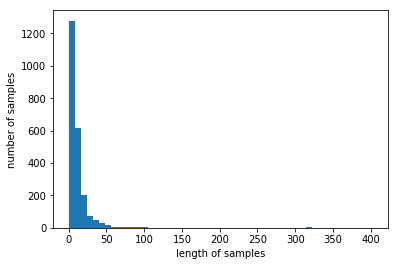

In [180]:
# 간단한 시각화
import matplotlib.pyplot as plt

# 댓글 길이 분포 확인
print('댓글의 최대 길이 :',max(len(l) for l in tokenized_data))
print('댓글의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### Train
- Doc2Vec  
- Skip-gram  
- CBOW  
- fasttext

In [203]:
# 모듈
from gensim.models import Word2Vec,FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [168]:
# Doc2Vec
# 토큰화되어 있는 배열을 돌면서 document 만듦
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_data)]
documents

ags=[805]),
 TaggedDocument(words=['iPad', 'Pro', '3', 'rd', '129', '형', '있다', '키', '보드', '사다', '사', '달라', '고', '엄마', '한테', '귀', '썀', '배기', '맞다'], tags=[806]),
 TaggedDocument(words=['원화', '가치', '줄다', '그거', '반영', '만원', '씩', '오르다', '같다'], tags=[807]),
 TaggedDocument(words=['잇다', '섭', '형', '지갑', '오늘', '흥'], tags=[808]),
 TaggedDocument(words=['지금', '아이패드', '에어', '3', '세대', '나', '아이패드', '7', '세대', '살다', '어떤', '가요', '그냥', '신제품', '을', '기다리다', '좋다'], tags=[809]),
 TaggedDocument(words=['구형', '프로', '눙물'], tags=[810]),
 TaggedDocument(words=['섭', '이형', '메인', '폰', '어떻다', '쓸다'], tags=[811]),
 TaggedDocument(words=['12', 'Z', '=', '12', '재탕'], tags=[812]),
 TaggedDocument(words=['양반', '구', '독자', '4일', '1만', '명씩', '늘어나다', '같다', '애'], tags=[813]),
 TaggedDocument(words=['그래서', 'se', '2', '(', '9', ')', '언제', '나오다'], tags=[814]),
 TaggedDocument(words=['가격', '오른', '게', '아니다', '환율'], tags=[815]),
 TaggedDocument(words=['형', '가격', '오르다', '환율', '올라서다', '아니다'], tags=[816]),
 TaggedDocument(words=['나', 

In [170]:
Doc2Vec_model = Doc2Vec(documents, vector_size = 10, epochs = 5, window = 7, min_count = 3, workers = 20)

In [171]:
Doc2Vec_model.most_similar('아이패드',topn=30)

C:\Users\jinji\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('고민', 0.9997791647911072),
 ('12', 0.9997720718383789),
 ('것', 0.999769389629364),
 ('애플', 0.9997610449790955),
 ('더', 0.9997010231018066),
 ('않다', 0.9996734261512756),
 ('안', 0.9996562004089355),
 ('보다', 0.999648928642273),
 ('너무', 0.999639093875885),
 ('좋다', 0.9996057748794556),
 ('맥북에어', 0.999603807926178),
 ('형', 0.9995985627174377),
 ('없다', 0.9995971322059631),
 ('프로', 0.9995932579040527),
 ('세대', 0.9995856881141663),
 ('만', 0.9995588064193726),
 ('인데', 0.9995569586753845),
 ('을', 0.9995278120040894),
 ('늘다', 0.999519407749176),
 ('가다', 0.9995180368423462),
 ('다', 0.9995144605636597),
 ('해보다', 0.9995083808898926),
 ('들다', 0.9995014667510986),
 ('사람', 0.9994980096817017),
 ('나', 0.999497652053833),
 ('가격', 0.9994958639144897),
 ('129', 0.999487578868866),
 ('(', 0.9994764924049377),
 ('3', 0.9994666576385498),
 ('혹시', 0.9994659423828125)]

In [196]:
#임베딩(w2v_skipgram)모델 생성
Skip_Gram_model = Word2Vec(
    tokenized_data,size=10, alpha = 0.025, window=3, min_count=3, workers=1, iter=1000, sg=1,negative=5) 
    # window 앞뒤로 고려하는 단어 갯수
    # sg : skip-gram은 1, cbow 는 0

In [197]:
Skip_Gram_model.most_similar('아이패드',topn=30) #cosine similarity로 계산

C:\Users\jinji\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('프로', 0.9660727381706238),
 ('세대', 0.9067190885543823),
 ('4', 0.900015115737915),
 ('3', 0.8910524845123291),
 ('그냥', 0.8658950924873352),
 ('쓰다', 0.8605921268463135),
 ('화요일', 0.8578914403915405),
 ('중', 0.854735255241394),
 ('살다', 0.8377954959869385),
 ('105', 0.8346081972122192),
 ('호환', 0.8317348957061768),
 ('비슷하다', 0.8300508856773376),
 ('에어', 0.8281659483909607),
 ('이번', 0.8150202035903931),
 ('문', 0.809234619140625),
 ('단종', 0.8051171898841858),
 ('인데', 0.7992121577262878),
 ('7', 0.7967156171798706),
 ('나오다', 0.7902779579162598),
 ('에도', 0.7899103164672852),
 ('셀룰러', 0.7890868186950684),
 ('이고', 0.7879298329353333),
 ('구매', 0.7845451235771179),
 ('존버하', 0.7827417850494385),
 ('라이트', 0.782037615776062),
 ('사다', 0.7815793752670288),
 ('새롭다', 0.7805541157722473),
 ('맥북', 0.769627571105957),
 ('그러면', 0.7665061354637146),
 ('주', 0.7661182284355164)]

In [176]:
# w2v_CBOW 모델 : 문장이 짧으면 학습이 안됨
CBOW_model = Word2Vec(
    tokenized_data, size=10, alpha = 0.25, window=3, min_count=3, workers=1, iter=1000, sg=0)

In [177]:
CBOW_model.most_similar('아이패드',topn=30)

C:\Users\jinji\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('프로', 0.959774374961853),
 ('3', 0.9352079033851624),
 ('세대', 0.92547607421875),
 ('4', 0.9044186472892761),
 ('호환', 0.7854647636413574),
 ('2', 0.7751724123954773),
 ('쓰다', 0.762385368347168),
 ('측면', 0.7558330297470093),
 ('7', 0.7444114685058594),
 ('256', 0.728553295135498),
 ('단종', 0.7153720855712891),
 ('화요일', 0.7092910408973694),
 ('맥', 0.7039214372634888),
 ('맥북', 0.6935015320777893),
 ('요키', 0.6884729266166687),
 ('승리', 0.6850090026855469),
 ('랑', 0.6841915845870972),
 ('지원', 0.6811634302139282),
 ('말고', 0.6721901893615723),
 ('64', 0.6706857085227966),
 ('일전', 0.6691746711730957),
 ('이면', 0.6634567975997925),
 ('에어', 0.6547362804412842),
 ('가면', 0.6479672789573669),
 ('새롭다', 0.6420460939407349),
 ('보다는', 0.6418128609657288),
 ('인치', 0.6225310564041138),
 ('가을', 0.6141365766525269),
 ('현재', 0.6066934466362),
 ('구매', 0.6051863431930542)]

### 유사도로 나온 단어들을 보면 CBOW보다 Skip-gram이 더 성능 좋은 듯. 비슷비슷함

### Test & Result

In [190]:
#index2word
words = Skip_Gram_model.wv.index2word #one-hot encoding알아서 해줌 

# text 토큰 임베딩 벡터
vectors = Skip_Gram_model.wv.vectors
vectors

array([[-1.1907248 , -0.47318932, -0.19061658, ..., -0.65467614,
        -0.6347658 , -0.5171822 ],
       [-1.1232268 , -0.2173161 , -0.19122736, ..., -0.6514765 ,
        -0.6352881 , -0.45324093],
       [-0.781966  , -0.25968596, -0.21737285, ..., -0.3999771 ,
        -0.5475299 , -0.42977437],
       ...,
       [-1.7007232 , -0.91761065,  0.47216368, ...,  1.297801  ,
        -0.13768645, -0.6268996 ],
       [ 0.55950296, -0.53762424, -0.61475176, ..., -0.493995  ,
        -1.877555  , -1.504852  ],
       [-1.4608988 , -2.5544386 ,  0.19260658, ...,  1.008655  ,
        -1.1725038 , -0.6892766 ]], dtype=float32)

In [147]:
# 토큰과 벡터 zip
Skip_Gram_model_result = dict(zip(words, vectors))

In [199]:
# Skip-Gram 모델 저장
Skip_Gram_model.save('NLP_Basic.w2v')

## 5. 인사이트 도출

In [215]:
# W2V 벡터화한 단어를 t-SNE 통해 시각화
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import gensim 
import gensim.models as g

warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rc('font', family='Malgun Gothic')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model = g.Doc2Vec.load('NLP_Basic.w2v')


vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

1421
[-1.0679833  -0.0945999   0.6352318   1.6916909  -1.2613652   0.40489164
  0.20547114 -0.637129    0.685207   -1.84982   ]


In [219]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.head(50)

,x,y
맥프로,-5.200692,-3.028131
바퀴,-5.774163,-1.936606
매직,-2.277009,-4.205866
키,-2.404077,-4.104545
보드,-2.407530,-4.106662
태블릿,-2.984185,1.308475
컴퓨터,-0.715310,1.731323
경계,-0.523490,2.206234
어,1.704461,3.180397
있다,0.423405,-1.706609


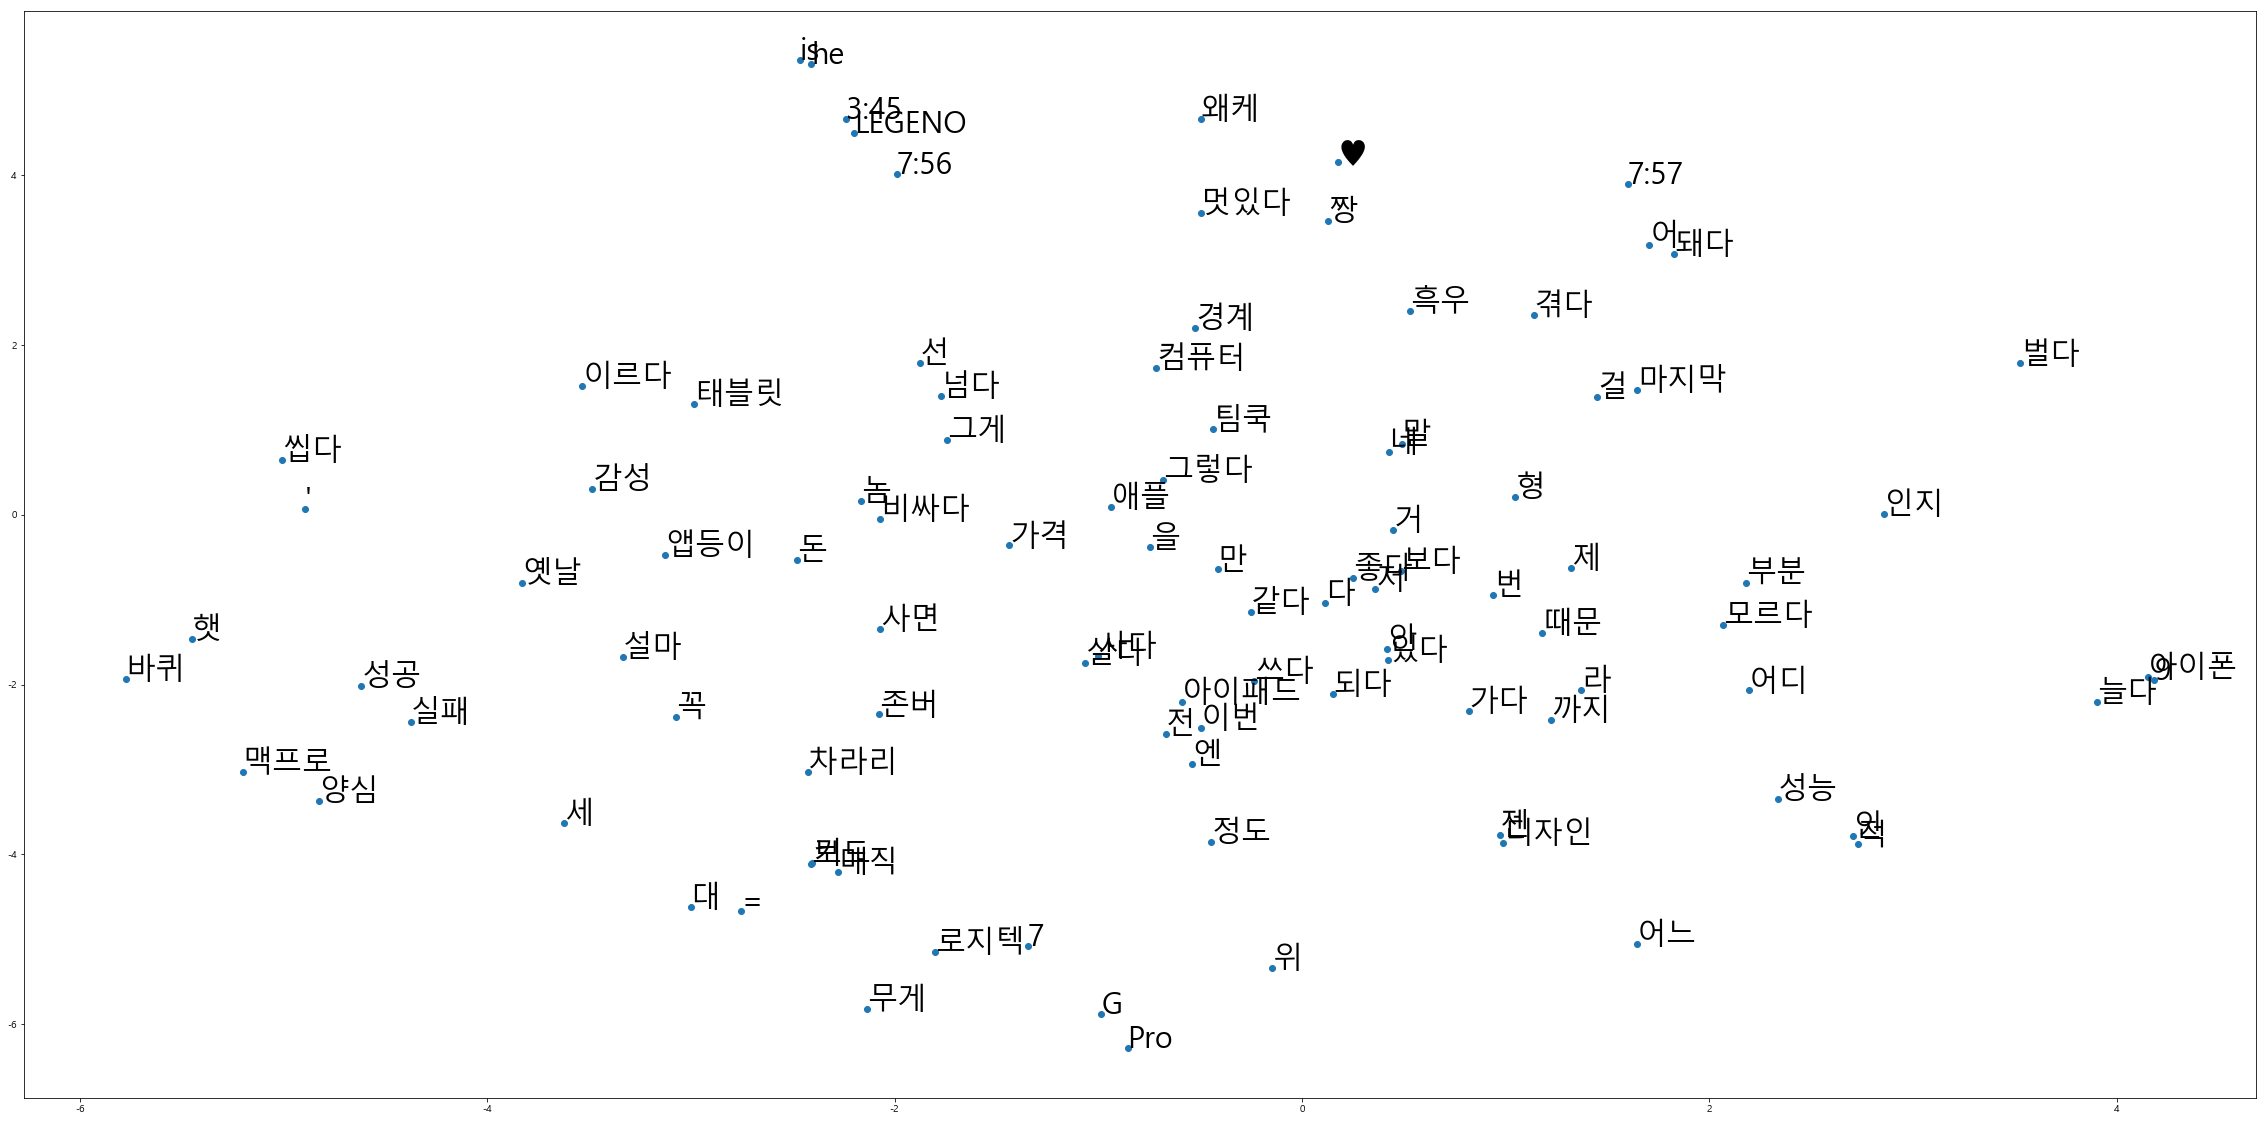

In [218]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

1. t-SNE를 통해서 시각화한 100가지의 단어를 보면, 아이패드, 맥프로, 아이폰, 아이패드라는 애플 제품 관련 언급이 많다. 예상외로 삼성 등의 타 회사의 언급은 애플 신제품 출시 댓글은 찾아볼 수 없다.  
2. 신제품에 매직 키보드가 있었기 때문에 로지텍이라는 유명 키보드 회사가 댓글에 같이 언급되었다.  
3. 애플제품 감성분석을 하고 싶었는데 감성이란 단어는 앱등이, 옛날 등의 단어와 같이 언급된다.
4. 유사도 도출시 '아이패드' 라는 단어와 3,그냥,쓰다 라는 단어가 가장 순위권으로 나왔다. 다들 그냥 프로3 쓸 껀가보다.

## Reference
1. Word2Vec 옵션 설명 https://lovit.github.io/nlp/representation/2018/03/26/word_doc_embedding/  
2. tokenized_Data https://wikidocs.net/50739  
3. Doc2Vec http://machinelearningkorea.com/2019/05/18/35/
4. youtube crawling 
참고 https://somjang.tistory.com/45  
5. 시각화 https://programmers.co.kr/learn/courses/21/lessons/1698#note

## 해보고 싶은 
1. Bert https://blog.nerdfactory.ai/2019/04/25/learn-bert-with-colab.html
2. 문장 분류 https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/

## 한계점
1. 토큰에 형태소 분석을 못함.  
2. 어떤 모델이 더 좋은지 휴리스틱하게 구분하는 방법 밖에 없나요?  
3. 다양한 최신 모델 (Bert, Khaiii 등등 install 이 복잡해서 못깔아봄)  
4. 텍스트 전처리가 어렵고 미흡하다. 다양한 모델(khaiii)로 못해본 탓 도 있는듯.
5. 애플 제품 감성분석을 하고 싶었는데 감성분석은 커녕 유사도 도출도 힘들었다. 